In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits

#data_dir0 = '/media/etdisk1/kepdata/data/lightcurves/011446443/'
data_dir0 = '/media/etdisk1/kepdata/data/lightcurves/005792202/'

3120320
sv = 0

kepid = 132

#import glob
from os import listdir

###

kid = 3

#print(listdir(data_dir0)[kid])

data_dir = data_dir0 + listdir(data_dir0)[kid]

#print(data_dir)


#hdu = fits.open(data_dir)


#print(hdu.info())


#print(hdu[1].header)


#data_dir = "/media/rd1/bchen/kplr008848104-2011073133259_llc.fits"

#hdu = fits.open(data_dir)

data_dir = '/media/etdisk1/kepdata/data/lightcurves/003120320/kplr003120320-2011271113734_llc.fits'

hdu = fits.open(data_dir)


dat = hdu[1].data


time_s = dat.field(0)

flux = dat.field(7)


time_s = time_s[sv:]
flux = flux[sv:]


plt.figure(figsize=(15, 15))
plt.plot(time_s, flux, '.k')
plt.grid(1)
plt.show(block=0)



import os



os.chdir("/media/rd1/kwillis/kepler_ml_v2")



from astropy.io import fits
import numpy as np
import os
import os.path
import matplotlib.pyplot as plt
import glob
import pandas as pd
import kepler_utils
import kepler_spline
from astropy.stats import sigma_clipped_stats
from astropy.constants import R_earth, R_sun

catalog_name = 'cumulative.csv'
catalog_frame= pd.read_csv(catalog_name,skiprows=65)



kepler_id = catalog_frame['kepid'].values
koi_period = catalog_frame['koi_period'].values

koi_duration = catalog_frame['koi_duration'].values
koi_depth = catalog_frame['koi_depth'].values
koi_ror = catalog_frame['koi_ror'].values
koi_sma = catalog_frame['koi_sma'].values
koi_incl = catalog_frame['koi_incl'].values
koi_srad = catalog_frame['koi_srad'].values
koi_smass = catalog_frame['koi_smass'].values



all_time = []
all_flux = []



#hdu = fits.open(name)
star_lc = hdu[1].data
bjdrefi = hdu[1].header['BJDREFI']
bjdreff = hdu[1].header['BJDREFF']
time = star_lc.TIME
time = time +bjdrefi+bjdreff -2454900
flux = star_lc.PDCSAP_FLUX
valid_indices = np.where(np.isfinite(flux))
time = time[valid_indices]
flux= flux[valid_indices]


time = time[sv:]
flux = flux[sv:]

if time.size:
    all_time.append(time)
    all_flux.append(flux)


<Figure size 1500x1500 with 1 Axes>

In [2]:
# Determine time gap threshold

print('Time Stats:\nMin = ' + str(np.nanmin(np.diff(time))) +
      '\nMax = ' + str(np.nanmax(np.diff(time))) +
      '\nMedian = ' + str(np.nanmedian(np.diff(time))) +
      '\nSD = ' + str(np.nanstd(np.diff(time))))

time_gap_thresh = np.nanstd(np.diff(time)) * 20


print(time_gap_thresh)

Time Stats:
Min = 0.0204327865504
Max = 0.858223162591
Median = 0.0204336273018
SD = 0.0179260603489
0.358521206979


In [3]:
all_time, all_flux = kepler_utils.split(all_time, all_flux, gap_width = time_gap_thresh)

In [4]:
for ii in range(0, len(all_time)):
    
    print(ii)
    print('len time = ', len(all_time[ii]))
    print('len flux = ', len(all_flux[ii]))

0
len time =  1455
len flux =  1455
1
len time =  1525
len flux =  1525
2
len time =  1461
len flux =  1461


#1  1455
#3  1455

Good =  1455 
Bad =  0
Total =  1455
sigma =  1322.87083148
a  1455
b  1111
#2  1111
#3  1111

Good =  1455 
Bad =  0
Total =  1455
sigma =  247.308155554
a  1111
b  1266
#2  1266
#3  1266

Good =  1455 
Bad =  0
Total =  1455
sigma =  197.89351938
a  1266
b  1313
#2  1313
#3  1313

Good =  1455 
Bad =  0
Total =  1455
sigma =  182.690761934
a  1313
b  1346
#2  1346
#3  1346

Good =  1455 
Bad =  0
Total =  1455
#1  1525
#3  1525

Good =  1525 
Bad =  0
Total =  1525
sigma =  1800.58394838
a  1525
b  1194
#2  1194
#3  1194

Good =  1525 
Bad =  0
Total =  1525
sigma =  263.121686336
a  1194
b  1276
#2  1276
#3  1276

Good =  1525 
Bad =  0
Total =  1525
sigma =  175.17389374
a  1276
b  1403
#2  1403
#3  1403

Good =  1525 
Bad =  0
Total =  1525
sigma =  167.289449131
a  1403
b  1442
#2  1442
#3  1442

Good =  1525 
Bad =  0
Total =  1525
#1  1461
#3  1461

Good =  1461 
Bad =  0
Total =  1461
sigma =  1705.02504073
a  1461
b  1137
#2  1137
#3  1137

Good =  1461 
Ba

/media/rd1/kwillis/kepler_ml_v2/kepler_spline.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 5))
/media/rd1/kwillis/kepler_ml_v2/kepler_spline.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 5))
/media/rd1/kwillis/kepler_ml_v2/kepler_spline.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `f

#1  1461
#3  1461

Good =  1461 
Bad =  0
Total =  1461
sigma =  1949.31764797
a  1461
b  1174
#2  1174
#3  1174

Good =  1461 
Bad =  0
Total =  1461
sigma =  334.503477465
a  1174
b  1086
#2  1086
#3  1086

Good =  1461 
Bad =  0
Total =  1461
sigma =  193.01298884
a  1086
b  1257
#2  1257
#3  1257

Good =  1461 
Bad =  0
Total =  1461
sigma =  164.025999135
a  1257
b  1347
#2  1347
#3  1347

Good =  1461 
Bad =  0
Total =  1461
#1  1455
#3  1455

Good =  1455 
Bad =  0
Total =  1455
sigma =  1232.06288846
a  1455
b  1115
#2  1115
#3  1115

Good =  1455 
Bad =  0
Total =  1455
sigma =  255.031549885
a  1115
b  1270
#2  1270
#3  1270

Good =  1455 
Bad =  0
Total =  1455
sigma =  199.534120134
a  1270
b  1349
#2  1349
#3  1349

Good =  1455 
Bad =  0
Total =  1455
sigma =  183.483906649
a  1349
b  1383
#2  1383
#3  1383

Good =  1455 
Bad =  0
Total =  1455
#1  1525
#3  1525

Good =  1525 
Bad =  0
Total =  1525
sigma =  1325.00270668
a  1525
b  1138
#2  1138
#3  1138

Good =  1525 
B

/media/rd1/kwillis/kepler_ml_v2/kepler_spline.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 5))
/media/rd1/kwillis/kepler_ml_v2/kepler_spline.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 5))
/media/rd1/kwillis/kepler_ml_v2/kepler_spline.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `f

ValueError: could not broadcast input array from shape (4,65) into shape (4,61)

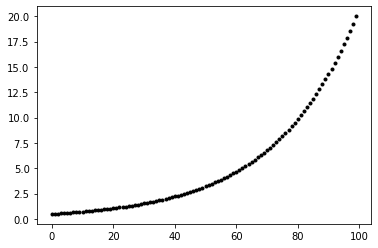

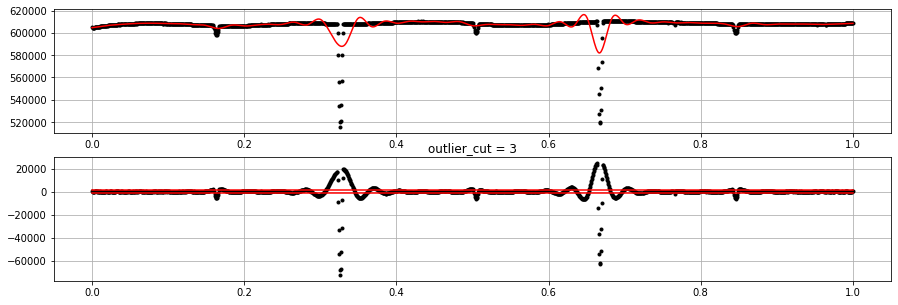

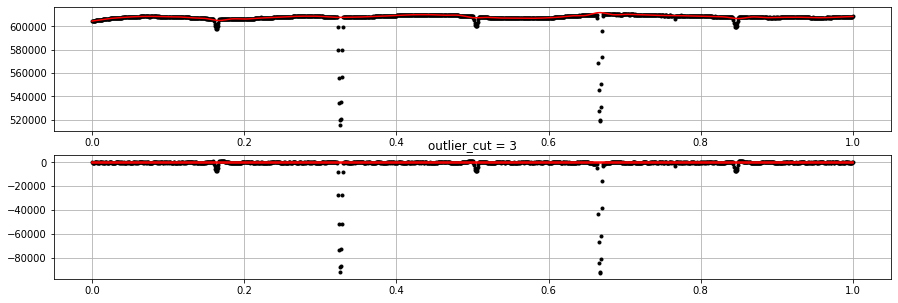

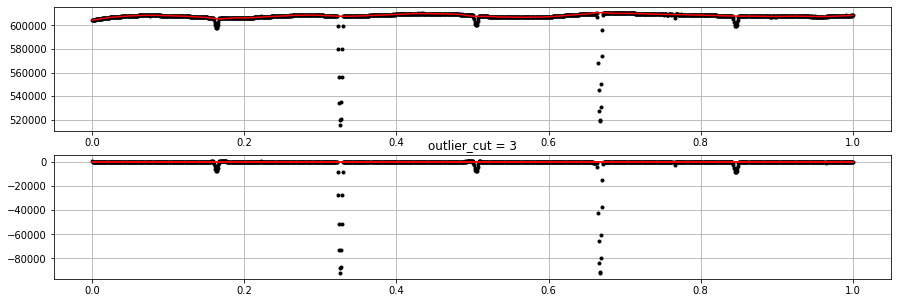

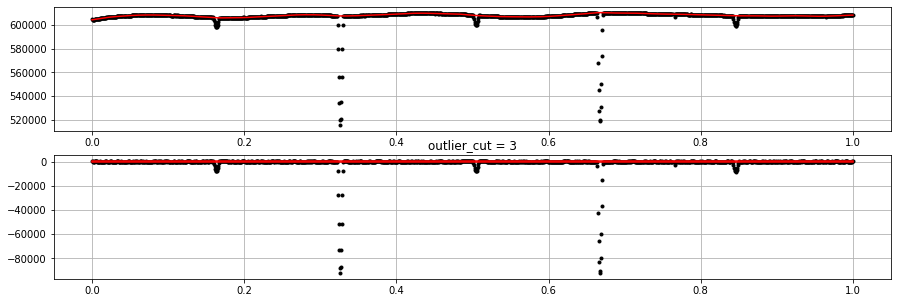

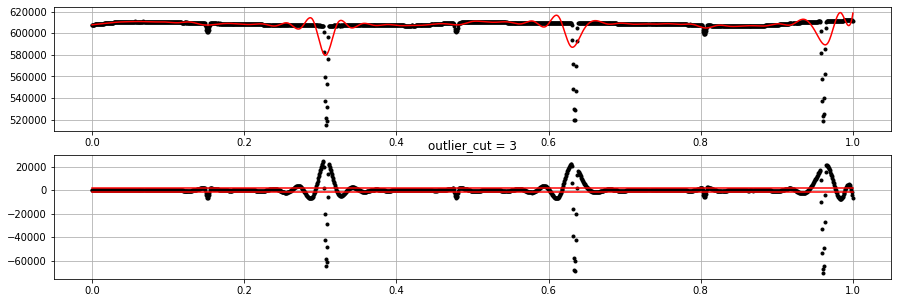

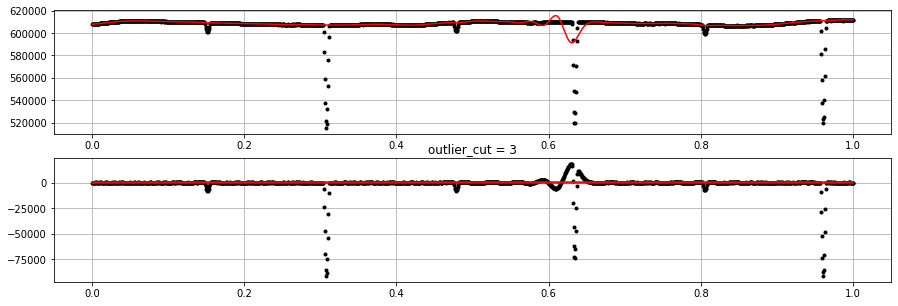

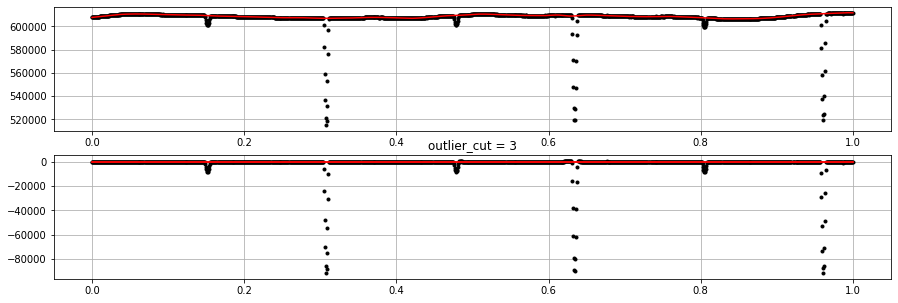

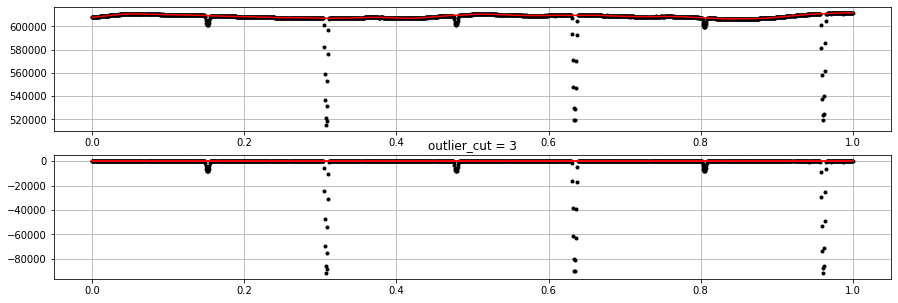

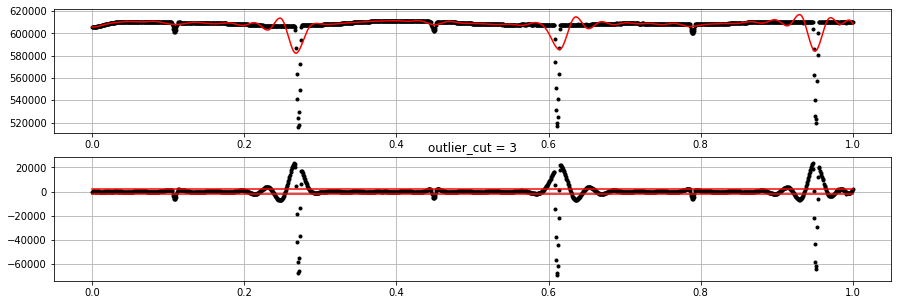

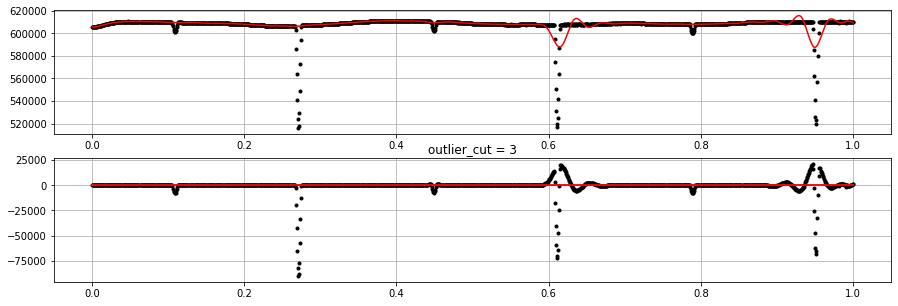

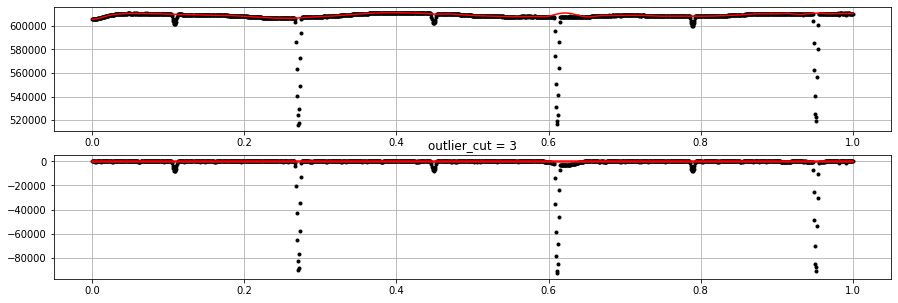

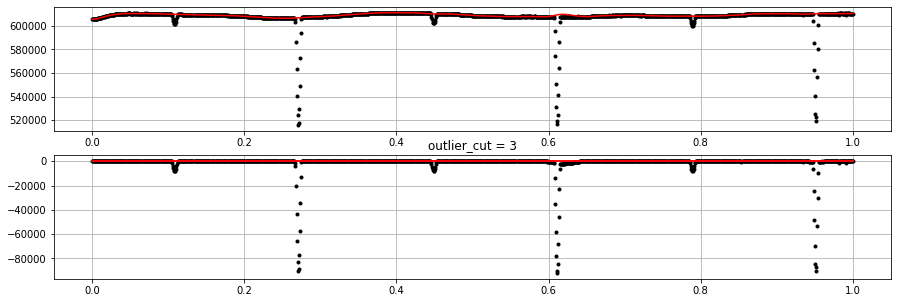

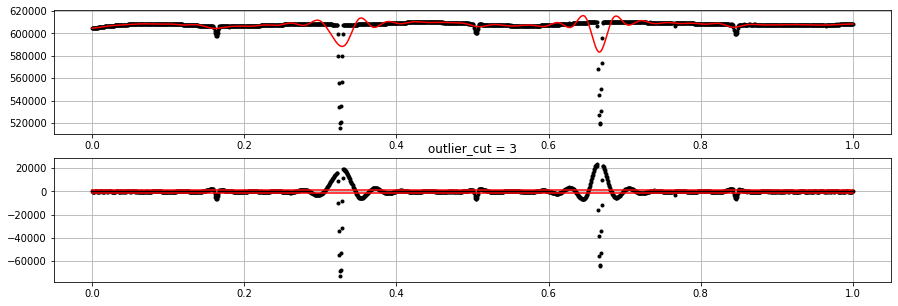

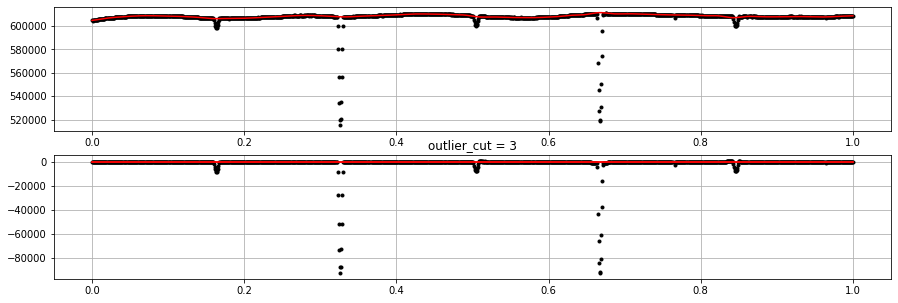

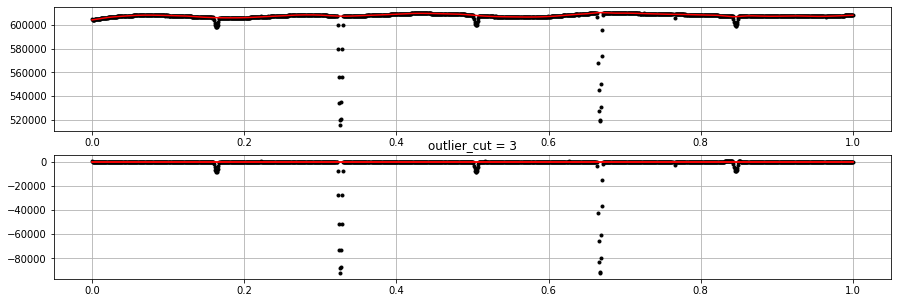

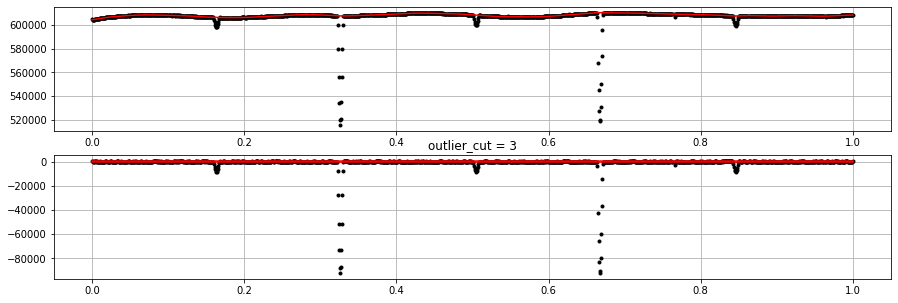

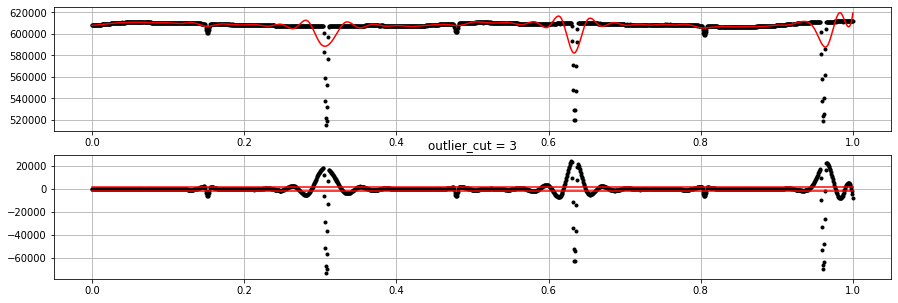

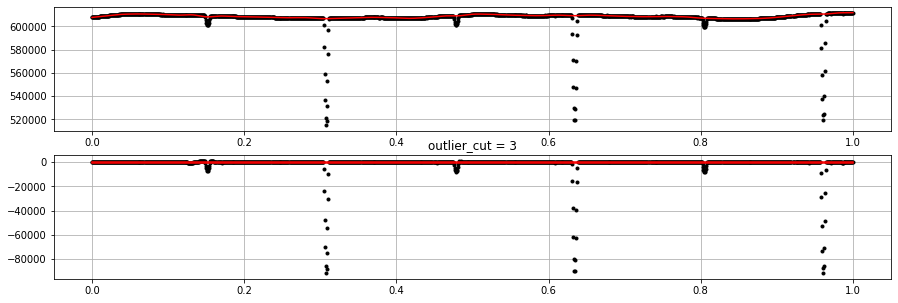

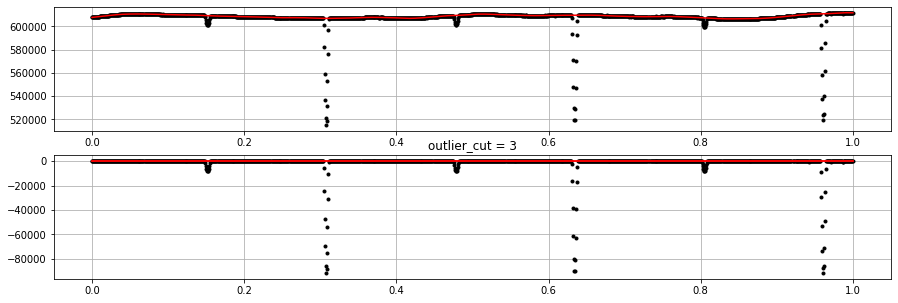

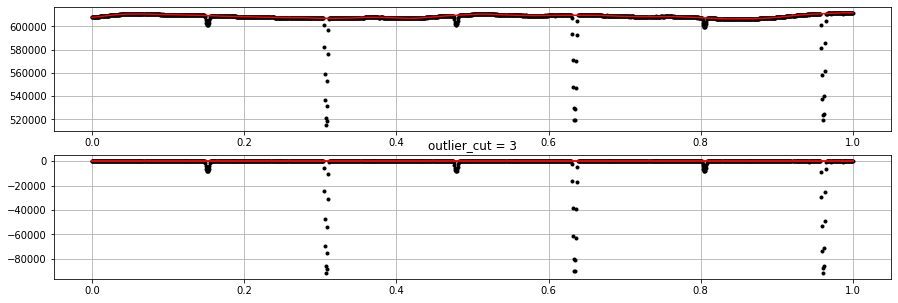

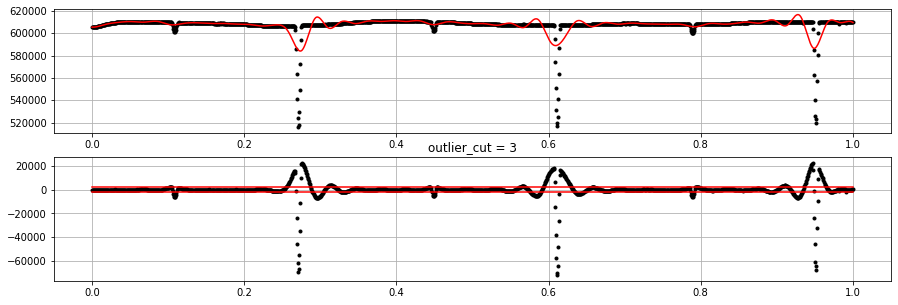

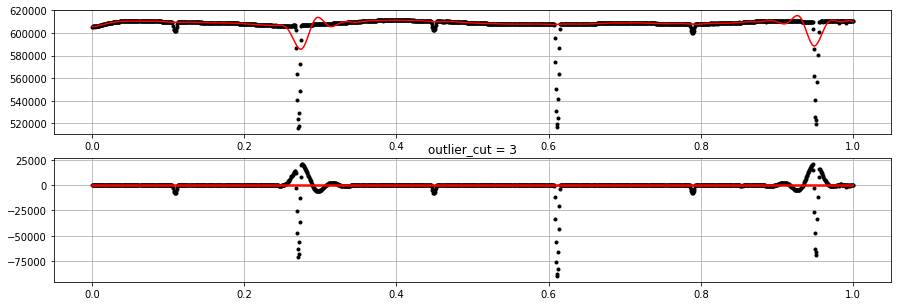

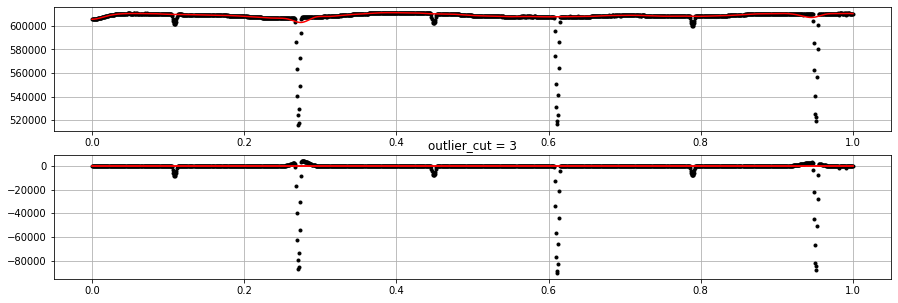

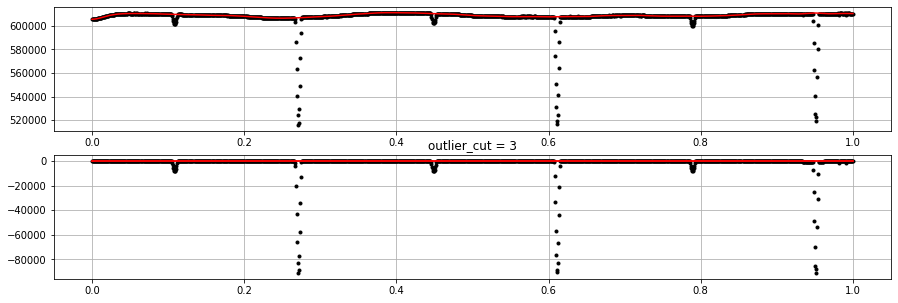

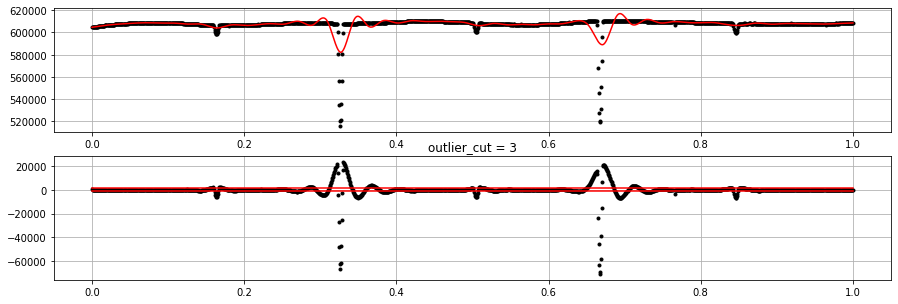

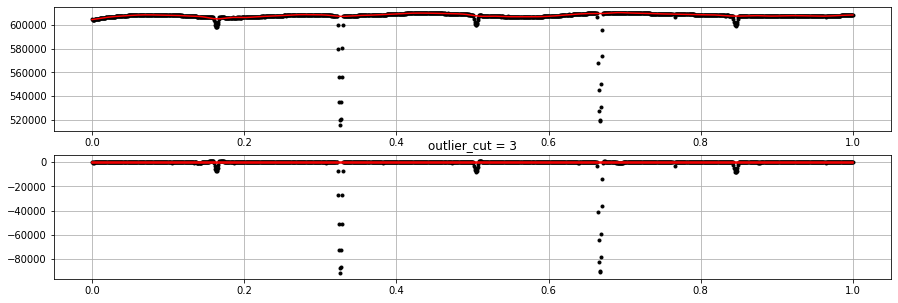

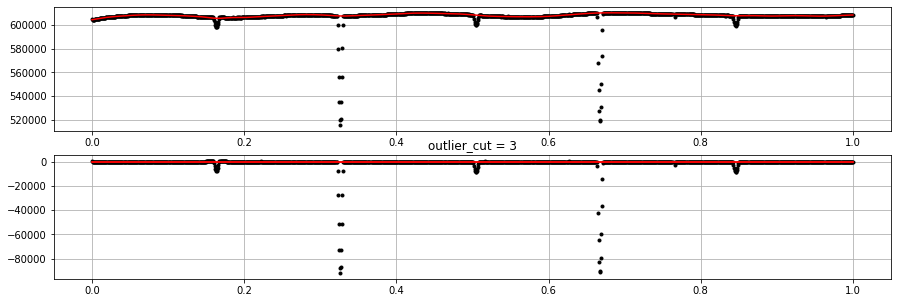

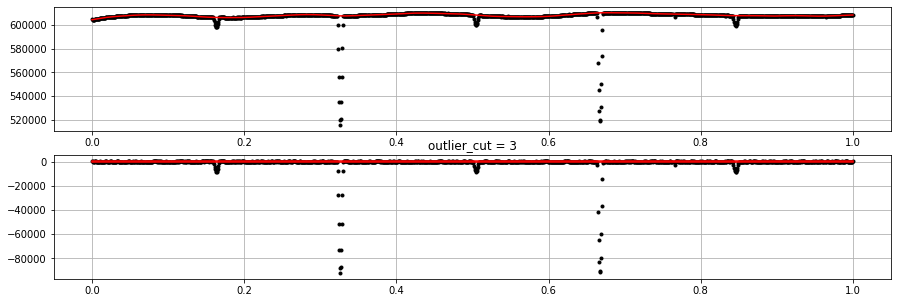

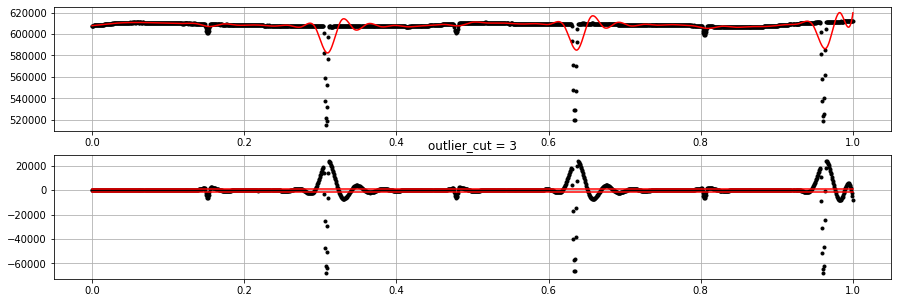

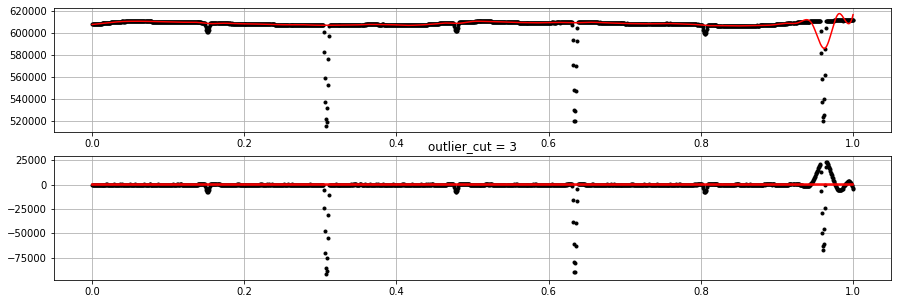

In [14]:
# new spline fit

bkspaces = np.logspace(np.log10(0.5), np.log10(20), num = 100)

plt.plot(bkspaces, '.k')

spline_orig = kepler_spline.choose_kepler_spline(all_time, all_flux, bkspaces, penalty_coeff = 1.0, verbose=False)[0]


In [7]:
koi = 6307

period = 10.25#koi_period[koi]

print(period)

10.25


In [15]:
flux_norm_orig = []

for kk in np.arange(len(all_flux)):

    flux_norm_orig.append(all_flux[kk] / spline_orig[kk])
    

flux_normf_orig = np.array([])

for ii in range(0, len(flux_norm_orig)):
    
    flux_normf_orig = np.concatenate((flux_normf_orig, flux_norm_orig[ii]))


import numpy as np
from kepler_lib import *

def signal(time_array, flux, period_id):

    time_array = kepler_utils.phase_fold_time(time_array, period_id, 0.0)
    sorted_i = np.argsort(time_array)
    time_array = time_array[sorted_i]
    flux = flux[sorted_i]

    global_view = kepler_utils.global_view(time_array, flux, period_id)

    return global_view


def signal_no_bin(time_array, flux, period_id):

    time_array = kepler_utils.phase_fold_time(time_array, period_id, 0.0)
    sorted_i = np.argsort(time_array)
    time_array = time_array[sorted_i]
    flux = flux[sorted_i]

    return time_array, flux




#period = koi_period[kepid]
time_array = time
detrend_array_orig = flux_normf_orig

tf_orig, out2_orig = signal_no_bin(time_array, detrend_array_orig, period)

out_orig = signal(time_array, detrend_array_orig, period)

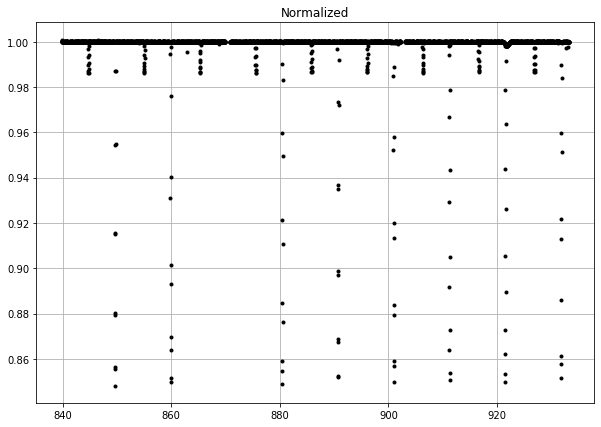

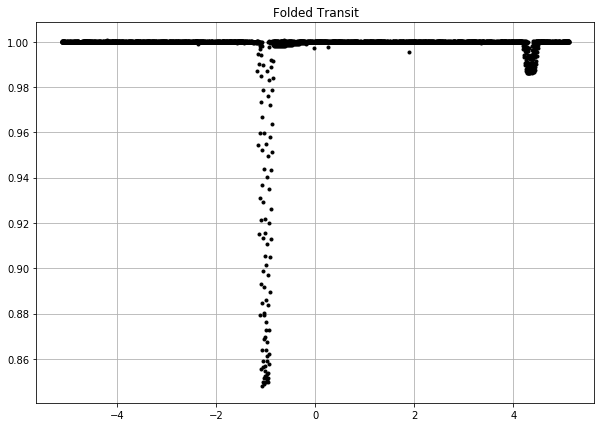

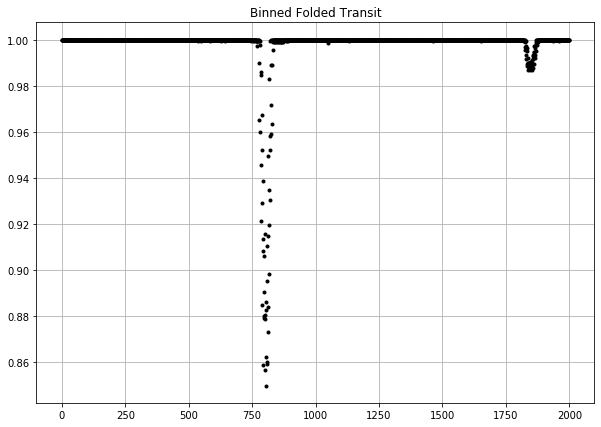

In [16]:

plt.figure(figsize=(10,7))
plt.title('Normalized')
plt.plot(time, flux_normf_orig, '.k')
plt.grid(1)


plt.figure(figsize=(10,7))
plt.title('Folded Transit')
plt.plot(tf_orig, out2_orig, '.k')
plt.grid(1)
plt.show(block=False)
#plt.close()


plt.figure(figsize=(10,7))
plt.title('Binned Folded Transit')
plt.plot(out_orig, '.k')
plt.grid(1)
plt.show(block=False)
plt.show()